# Plotting Ternary Phase Diagrams and Using Triangular Axes

Often in thermodynamics, it is useful to use a two dimensional plot to express equilibria in a three component system with fixed potentials. The `ternplot` API provides a straightforward way to calculate equilibria and generate ternary phase diagrams. Alternatively, if you already have an equilibrium calculation, you can directly import and use `eqplot`.

## ternplot

Here we will use the ternplot API to plot an isothermal section of the Al-Cu-Y system from the thermodynamic database found at the [NIST CALPHAD assessments](http://hdl.handle.net/11115/101) assessed by Zhang et al. [Calphad 35 (2011)](https://doi.org/10.1016/j.calphad.2011.09.008).

Wall time: 5min 56s


<TriangularAxesSubplot:title={'center':'Al-Cu-Y'}, xlabel='X(AL)', ylabel='X(Y)'>

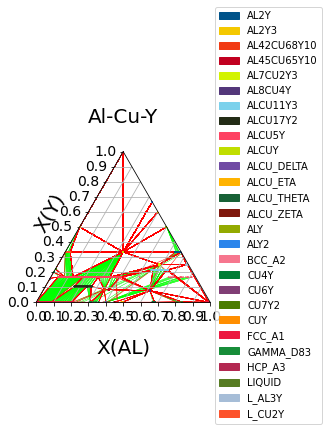

In [1]:
%matplotlib inline
from pycalphad import Database, ternplot
from pycalphad import variables as v

db_al_cu_y = Database('Al-Cu-Y.tdb')
comps = ['AL', 'CU', 'Y', 'VA']
phases = list(db_al_cu_y.phases.keys())
conds = {v.T: 830, v.P:101325, v.X('AL'): (0,1,0.015), v.X('Y'): (0,1,0.015)}

%time ternplot(db_al_cu_y, comps, phases, conds, x=v.X('AL'), y=v.X('Y'))

## triangular projection

Importing the `pycalphad.plot.triangular` module automatically registers a `'triangular'` projection in matplotlib for you to use in custom plots, such as liquidus projections or contour plots of custom property models.

Here we will use pycalphad to calculate the mixing enthalpy of the FCC phase in our Al-Cu-Y system. Then we will the triangular projection to plot the calculated points as a colored scatterplot on the triangular axes.

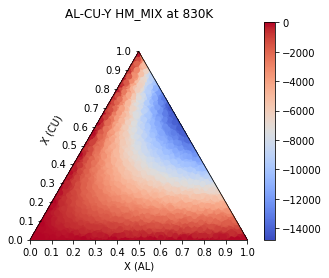

In [2]:
import matplotlib.pyplot as plt
from pycalphad.plot import triangular
from pycalphad import calculate

# some sample data, these could be from an equilibrium calculation or a property model.
# here we are calculating the mixing enthlapy of the FCC_A1 phase at 830K. 
c = calculate(db_al_cu_y, comps, 'FCC_A1', output='HM_MIX', T=830, P=101325, pdens=5000)

# Here we are getting the values from our plot. 
xs = c.X.values[0, 0, 0, :, 0]  # 1D array of Al compositions
ys = c.X.values[0, 0, 0, :, 1]  # 1D array of Cu compositions
zs = c.HM_MIX.values[0, 0, 0, :]  # 1D array of mixing enthalpies at these compositions

# when we imported the pycalphad.plot.triangular module, it made the 'triangular' projection available for us to use.
fig = plt.figure()
ax = fig.add_subplot(projection='triangular')
ax.scatter(xs, ys, c=zs, 
           cmap='coolwarm', 
           linewidth=0.0)

# label the figure
ax.set_xlabel('X (AL)')
ax.set_ylabel('X (CU)')
ax.yaxis.label.set_rotation(60)  # rotate ylabel
ax.yaxis.set_label_coords(x=0.12, y=0.5)  # move the label to a pleasing position
ax.set_title('AL-CU-Y HM_MIX at 830K')

# set up the colorbar
cm = plt.cm.ScalarMappable(cmap='coolwarm')
cm.set_array(zs)
fig.colorbar(cm);